# Current population of Germany

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
import matplotlib.dates as mdates

# Options and Settings

In [2]:
%matplotlib inline
sns.set_theme(style='dark')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Germany, reference date.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Date,Population
0,1950-12-31,50958125
1,1951-12-31,51434777
2,1952-12-31,51863761
3,1953-12-31,52453806
4,1954-12-31,52943295
...,...,...
66,2016-12-31,82521653
67,2017-12-31,82792351
68,2018-12-31,83019213
69,2019-12-31,83166711


In [5]:
df['Year'] = pd.DatetimeIndex(df['Date']).year                         # extract year
df['Month'] = pd.DatetimeIndex(df['Date']).month                       # extract month
df['Day'] = pd.DatetimeIndex(df['Date']).day                           # extract day

df

,Date,Population,Year,Month,Day
0,1950-12-31,50958125,1950,12,31
1,1951-12-31,51434777,1951,12,31
2,1952-12-31,51863761,1952,12,31
3,1953-12-31,52453806,1953,12,31
4,1954-12-31,52943295,1954,12,31
...,...,...,...,...,...
66,2016-12-31,82521653,2016,12,31
67,2017-12-31,82792351,2017,12,31
68,2018-12-31,83019213,2018,12,31
69,2019-12-31,83166711,2019,12,31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        71 non-null     object
 1   Population  71 non-null     int64 
 2   Year        71 non-null     int64 
 3   Month       71 non-null     int64 
 4   Day         71 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [7]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Year Grouping

In [8]:
df1 = df.iloc[:21]                                    # year 1950 - 1970
df2 = df.iloc[21:51]                                  # year 1971 - 2000
df3 = df.iloc[51:]                                    # year 2000 upwards

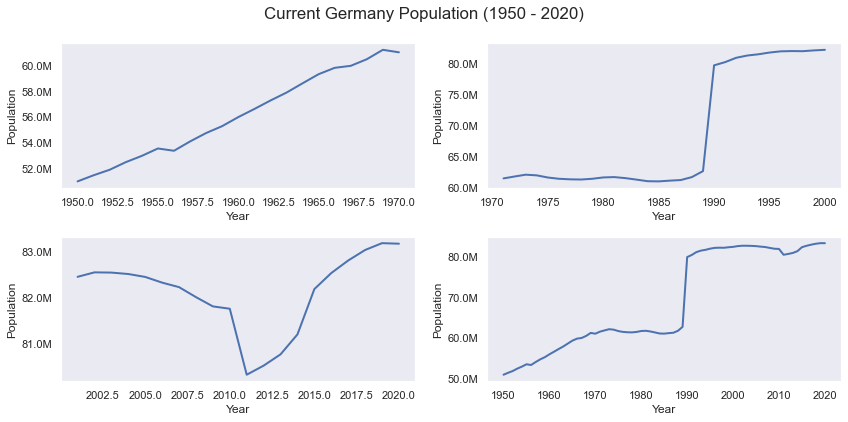

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
plt.suptitle('Current Germany Population (1950 - 2020)')

g = sns.lineplot(
    data=df1, 
    x='Year', y='Population',
    estimator=None, linewidth=2, ax=ax1
)
ax1.yaxis.set_major_formatter(formatter)

g = sns.lineplot(
    data=df2, 
    x='Year', y='Population',
    estimator=None, linewidth=2,
    ax=ax2
)
ax2.yaxis.set_major_formatter(formatter)

g = sns.lineplot(
    data=df3, 
    x='Year', y='Population',
    estimator=None, linewidth=2,
    ax=ax3
)
ax3.yaxis.set_major_formatter(formatter)

g = sns.lineplot(
    data=df, 
    x='Year', y='Population',
    estimator=None, linewidth=2,
    ax=ax4
)
ax4.yaxis.set_major_formatter(formatter)